In [286]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [209]:
df = pd.read_csv("selected.csv", index_col = False)
df.drop(["Unnamed: 0"], inplace = True, axis = 1)

In [210]:
df = df.replace(' NA', np.nan)
df = df.replace('NA', np.nan)

In [231]:
df.isna().sum(axis = 0).sort_values()[-15:]

218883_s_at      0
211779_x_at      0
221028_s_at      0
218914_at        0
211762_s_at      0
203391_at        0
204768_s_at      0
208180_s_at      0
217815_at        0
risksg           1
risknpi          2
grade            2
Histtype         4
Angioinv        77
Lymp_infil     117
dtype: int64

In [211]:
df['NPI'] = df['NPI'].astype('float')
df['NPI'].replace(np.nan, df['NPI'].mean(), inplace = True)

In [232]:
removals = ['t.rfs',
 'e.rfs',
 't.os',
 'e.os',
 't.dmfs',
 'e.dmfs',
 't.tdm',
 'e.tdm', "samplename", "id","filename","hospital", 'Surgery_type', 'Histtype', 'Angioinv',
       'Lymp_infil', 'node', 'grade', 'er', 'risksg', 'risknpi',
        'risk_AOL', 'veridex_risk']
rest = [i for i in df.columns if i not in removals]

In [233]:
X = df[rest]
X = X.replace(' NA', np.nan)
X = X.replace("NA", np.nan)
X = X.dropna()

In [234]:
X

,219340_s_at,217771_at,202418_at,206295_at,201091_s_at,204015_s_at,200726_at,200965_s_at,210314_x_at,221882_s_at,...,204218_at,221241_s_at,209862_s_at,217019_at,210593_at,216103_at,age,size,NPI,AOL_os_10y
0,7.014110,9.938705,11.053083,5.326001,10.964107,6.244280,10.926361,8.962608,10.523859,10.926365,...,8.319661,5.649573,8.180319,7.751753,4.528973,3.944944,57,3.0,4.60,62.7
1,7.326724,6.374728,10.596457,8.290123,11.594716,6.542130,12.242090,9.531718,10.342614,9.555092,...,9.118091,7.599788,8.332043,7.669779,4.190050,5.215237,57,3.0,4.60,69.0
2,6.974651,9.226757,10.834848,5.731169,9.166088,6.586000,11.661716,10.238680,10.144875,9.308048,...,8.927673,4.987613,9.023475,7.134818,6.538038,5.191881,48,2.5,4.50,66.2
3,7.703683,8.169183,11.627066,8.538247,9.086937,8.477335,12.174021,9.819279,10.888251,10.208241,...,9.292112,7.205051,8.374399,7.912452,7.230222,4.540211,42,1.8,4.36,84.9
4,6.581141,7.496745,11.500773,5.979282,8.887616,7.398170,11.484011,11.489233,9.702690,10.931843,...,9.166668,6.973316,7.599664,7.539716,6.421427,5.278598,46,3.0,3.60,80.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,6.954604,10.129438,10.888537,6.915913,10.740020,6.139044,12.018292,8.323876,8.839213,9.604668,...,9.681136,8.542533,7.888977,6.592585,4.429037,3.218512,39,2.2,4.44,67.7
194,4.108023,8.701039,10.908745,6.655799,11.145993,7.044179,11.711415,10.428482,9.634663,11.067820,...,8.937584,6.457199,9.263448,6.427916,6.215172,6.154912,46,3.2,4.64,62.7
195,5.667819,10.940586,10.464572,6.845962,10.463171,9.980030,11.939616,9.615587,9.424510,7.743568,...,9.079387,7.138855,8.577323,6.539374,7.436809,6.104234,47,2.5,2.50,87.6
196,7.466355,10.032314,10.894581,7.338324,8.609631,10.528216,11.848449,10.528911,10.517222,9.298178,...,9.504684,8.603733,8.079926,7.798234,5.624854,6.104978,43,1.2,3.24,89.6


In [235]:
y = df["t.os"]

In [236]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [238]:
lr = linear_model.LinearRegression(normalize = True)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [239]:
lr.predict(X_test)

array([8198.26716837, 2326.02249308, 3756.4955394 , 3265.73237672,
       6570.77298864, 4670.12139991, 4647.61282827, 5364.76925281,
       4565.97247017, 4346.79825571, 4511.78570065, 5490.61658898,
       5652.9861509 , 4067.27151762, 3417.33904311, 2284.64662948,
       6841.46409964, 5308.78956739, 6176.79572032, 2933.37501191])

In [240]:
lr.score(X_test, y_test)

-0.5081822869484691

In [241]:
from sklearn import svm
regr = svm.SVR()

In [242]:
regr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [243]:
regr.score(X_test, y_test)

-0.02040889880747998

In [244]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error    

In [245]:
rfreg = RandomForestRegressor(n_estimators=500, )
rfreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [246]:
rfreg.score(X_test, y_test)

0.11807499260279951

In [247]:
mean_squared_error(y_test, rfreg.predict(X_test))**0.5

2003.7911754242257

In [270]:
feature_imp = rfreg.feature_importances_
sorted_idx = np.argsort(feature_imp)
sorted_idx

array([ 1,  3, 37, 39,  5, 75, 34, 40, 13, 26, 67, 77, 35, 24, 47, 19, 50,
       11, 73, 51, 78, 42,  9, 15, 64,  0,  7,  8, 59, 48, 17, 79, 12, 57,
       10, 18, 72, 14, 68, 28, 63, 56, 33, 41, 44, 46, 54, 74, 29, 70, 31,
       69, 66, 38, 22, 62, 71, 21,  6, 16, 60, 45, 61, 30, 53, 55, 43, 65,
       27,  2,  4, 58, 49, 25, 36, 76, 20, 23, 52, 32])

In [268]:
features = X_train.columns[sorted_idx]
features

Index(['217771_at', '206295_at', '201068_s_at', '214919_s_at', '204015_s_at',
       '216103_at', '217815_at', '209835_x_at', '212567_s_at', '204768_s_at',
       '221634_at', 'size', '201368_at', '204740_at', '208683_at', '201664_at',
       '215633_x_at', '219588_s_at', '217019_at', '221928_at', 'NPI',
       '203306_s_at', '221882_s_at', '201663_s_at', '216010_x_at',
       '219340_s_at', '200965_s_at', '210314_x_at', '211040_x_at', '215510_at',
       '210028_s_at', 'AOL_os_10y', '204073_s_at', '209524_at', '217767_at',
       '218782_s_at', '209862_s_at', '211382_s_at', '220886_at', '211762_s_at',
       '214915_at', '209500_x_at', '204888_s_at', '217471_at', '221816_s_at',
       '217102_at', '221916_at', '210593_at', '218914_at', '204218_at',
       '211779_x_at', '202239_at', '202687_s_at', '218478_s_at', '212014_x_at',
       '205848_at', '221241_s_at', '204014_at', '200726_at', '221344_at',
       '218430_s_at', '219510_at', '217404_s_at', '221028_s_at', '204540_at',
       '

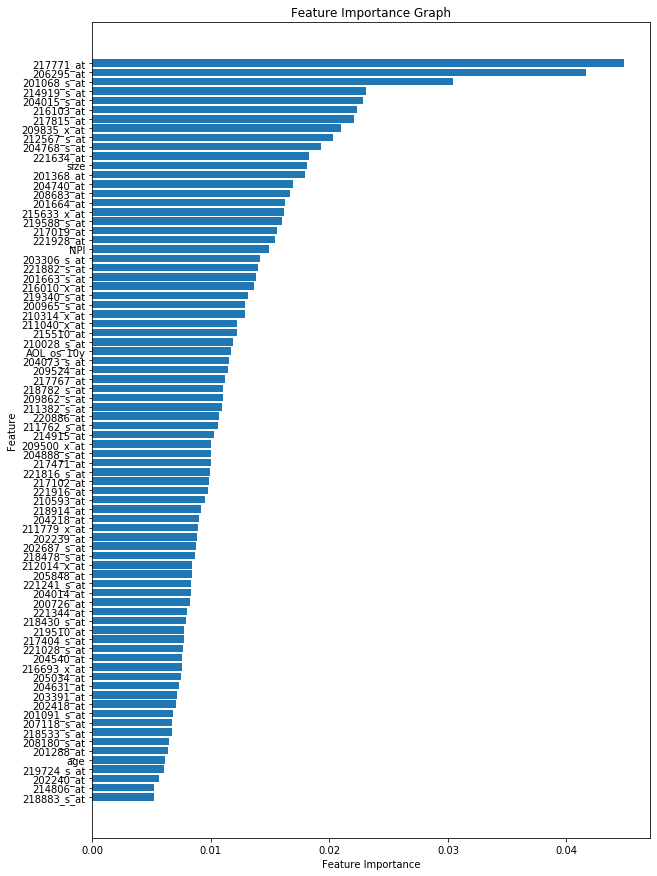

In [274]:
plt.figure(figsize = (10, 15))
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.barh(pos[:15], feature_imp[sorted_idx][:15])
# plt.yticks(pos[:15], features[:15]);
# plt.show()
pos = np.arange(sorted_idx.shape[0])
plt.barh(pos, feature_imp[sorted_idx])
plt.yticks(pos, features[::-1]);
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph');

In [282]:
# features[:22]

Index(['217771_at', '206295_at', '201068_s_at', '214919_s_at', '204015_s_at',
       '216103_at', '217815_at', '209835_x_at', '212567_s_at', '204768_s_at',
       '221634_at', 'size', '201368_at', '204740_at', '208683_at', '201664_at',
       '215633_x_at', '219588_s_at', '217019_at', '221928_at', 'NPI',
       '203306_s_at'],
      dtype='object')

In [283]:
cols = features[:21]
X = df[cols]
y = df['t.os']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)


In [284]:
rfreg = RandomForestRegressor(n_estimators=200)
rfreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [285]:
rfreg.score(X_test, y_test)

-0.5256252628454812

In [248]:
adaboost = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth = 5),
                             n_estimators=10000,
                             loss = 'exponential',
                             learning_rate=1)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [139]:
adaboost.score(X_test, y_test)

0.06293133517246885

In [124]:
mean_squared_error(y_test, adaboost.predict(X_test))

4917288.339896582

In [141]:
params = {'n_estimators': 500,
          'max_depth': 10,
          'min_samples_split': 5,
          'learning_rate': 0.01}

In [50]:
gradboost = GradientBoostingRegressor(**params)

In [51]:
gradboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
gradboost.score(X_test, y_test)

0.030014310914953324

In [48]:
gradboost.predict(X_test)

array([4527.58723515, 4342.77025358, 3999.99170916, 3291.09911654,
       5177.95434515, 4496.6563058 , 4871.76987045, 4645.71575901,
       4487.28310247, 3500.2028284 , 4655.80960955, 4576.71243431,
       4127.35127166, 4149.65063051, 3621.85262475, 4794.44337693,
       2996.70416133, 4067.19220632, 5156.95667338, 3429.30951022])

In [64]:
import matplotlib.pyplot as plt

In [66]:
feature_imp = gradboost.feature_importances_
sorted_idx = np.argsort(feature_imp)

In [67]:
features = X_train.columns[sorted_idx]

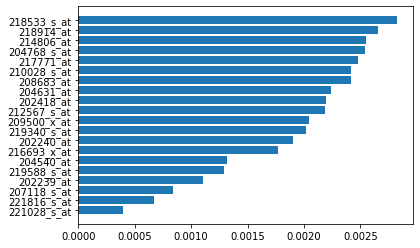

In [70]:
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[:20], feature_imp[sorted_idx][:20])
plt.yticks(pos[:20], features[sorted_idx][:20]);


In [72]:
cols = features[sorted_idx][:12]

In [82]:
X = df[cols]
y = df['t.os']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [84]:
gradboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls',
                          max_depth=10, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
gradboost.score(X_test, y_test)

-0.32892805602383746

Index(['Histtype', 'Angioinv', 'Lymp_infil', 'node', 'grade', 'er', 't.rfs',
       'e.rfs', 't.os', 'e.os', 't.dmfs', 'e.dmfs', 't.tdm', 'e.tdm', 'risksg',
       'NPI', 'risknpi', 'AOL_os_10y', 'risk_AOL', 'veridex_risk'],
      dtype='object')